### DATA 255 - Homework No.3 - Custom CNNs

#### Step 1. Create your custom dataset featuring 3 custom categories of at least 100 images each

In [1]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
import pathlib
from PIL import Image

#### The dataset named spider_dataset has been created by scrapping web for images of spider under 3 categories namely : 'wolf_spider', 'black_widow', 'black_and_gold_garden_spider'

In [2]:
# Define the main data directory
data_dir = "spiders_dataset"  

# Initialize the total_images counter and the category_counts dictionary
total_images = 0
category_counts = {}

# Traverse the directory
for root, _, files in os.walk(data_dir):
    # root: Current directory path
    # _: Directory names within the current directory (not used in this code)
    # files: File names within the current directory

    category = os.path.basename(root)
    if category not in category_counts:
        category_counts[category] = 0

    for file in files:
        # Check if the file ends with .jpg, .jpeg, or .png
        if file.endswith(('.jpg', '.jpeg', '.png')):  
            total_images += 1  
            category_counts[category] += 1 

# Printing the total number of images found
print("Total images downloaded:", total_images)

# Printing the total number of images found in each category
for category, count in category_counts.items():
    print(f"Total images in category '{category}': {count}")

Total images downloaded: 655
Total images in category 'spiders_dataset': 0
Total images in category 'wolf_spider': 216
Total images in category 'black_widow': 226
Total images in category 'black_and_gold_garden_spider': 213


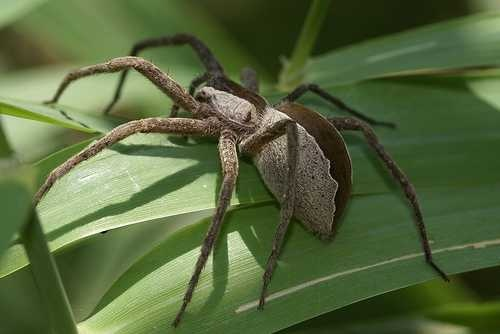

In [3]:
wolf_spider_path = pathlib.Path(data_dir) / "wolf_spider"  # Ensure correct path using pathlib
wolf_spider_imgs = list(wolf_spider_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(wolf_spider_imgs[1]))

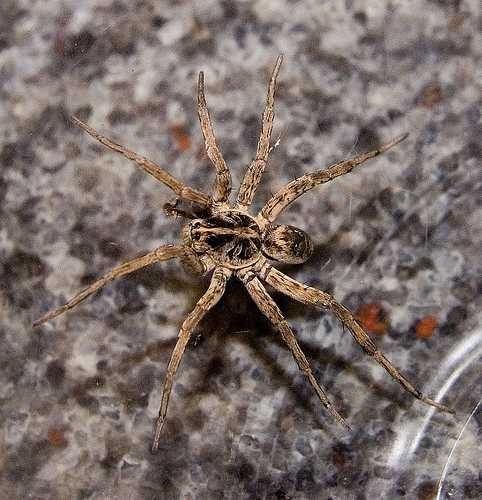

In [4]:
Image.open(str(wolf_spider_imgs[5]))

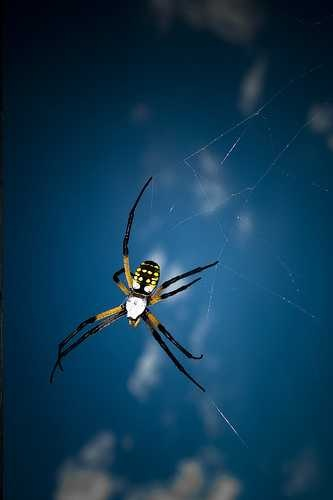

In [5]:
black_and_gold_garden_spider_path = pathlib.Path(data_dir) / "black_and_gold_garden_spider"  # Ensure correct path using pathlib
black_and_gold_garden_spider_imgs = list(black_and_gold_garden_spider_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(black_and_gold_garden_spider_imgs[2]))

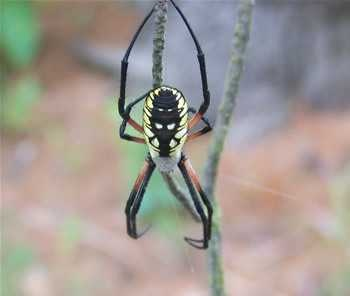

In [6]:
Image.open(str(black_and_gold_garden_spider_imgs[7]))

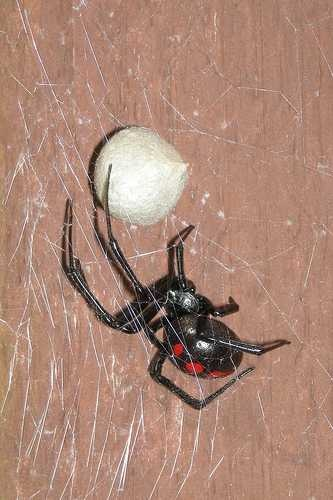

In [7]:
barn_spider_path = pathlib.Path(data_dir) / "black_widow"  # Ensure correct path using pathlib
barn_spider_imgs = list(barn_spider_path.glob('*.jpg'))  # Adjust file extension if needed

Image.open(str(barn_spider_imgs[5]))

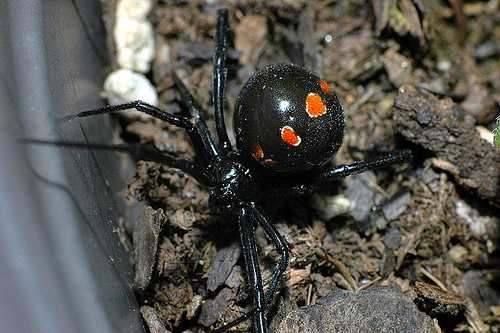

In [8]:
Image.open(str(barn_spider_imgs[7]))

#### Step 2. Split this data between 80% training and 20% test

In [9]:
# transformations are applied to data_dir
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

dataset = ImageFolder(data_dir)

#### Finding the class names in the class_names attributes on these dataset

In [10]:
class_names = dataset.classes
print(class_names)

['black_and_gold_garden_spider', 'black_widow', 'wolf_spider']


In [11]:
train_size = int(0.8 * len(dataset))  # Calculate 80% of dataset size
test_size = len(dataset) - train_size  # Calculate 20% of dataset size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [12]:
print(len(train_dataset))

524


In [13]:
print(len(test_dataset))

131


#### Step 3. Preprocess the data as you see fit

#### As part of pre-processing the images, we have resized the shorter side of image to 256 pixels. The center of the image is cropped to 224X224 pixels. ToTensor will convert the image to a PyTorch tensor and scales pixels to 0,1. Further, we have normalised the tensor to have a specific mean and standard deviation. 

#### These transformations are defined in data_transform

In [14]:


data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Rescale
])

In [15]:
# Apply the transformations to the datasets
train_dataset = [(data_transform(img), label) for img, label in train_dataset]
test_dataset = [(data_transform(img), label) for img, label in test_dataset]

In [16]:
# dataLoader to load the data in batches for NN training
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].


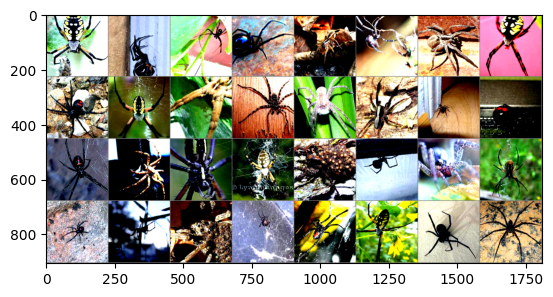

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0182073..0.9754903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.4308496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6384109..2.1345534].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9481792..2.1484594].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.4110641].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906

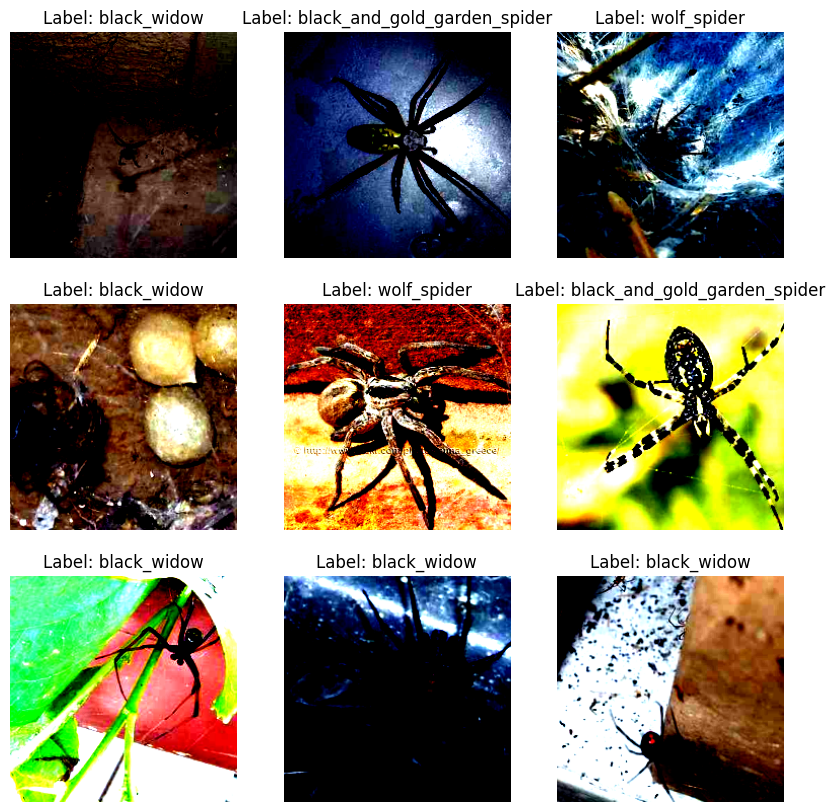

In [18]:
# Assuming train_dl is your PyTorch DataLoader
data_iter = iter(train_dataloader)

# Fetch the first batch of data
images, labels = next(data_iter)

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()

#### The images above are appearing darker due to the preprocessing step, transform.normalize which is to normalise the image pixel values based on the imagenet data statistics. This normalization is better and is advised to perform for training deep neural networks, but it make images appear darker if displayed without reversing the normalisation.

#### Let's see the images by reversing the normalisation only for visualisation purposes here

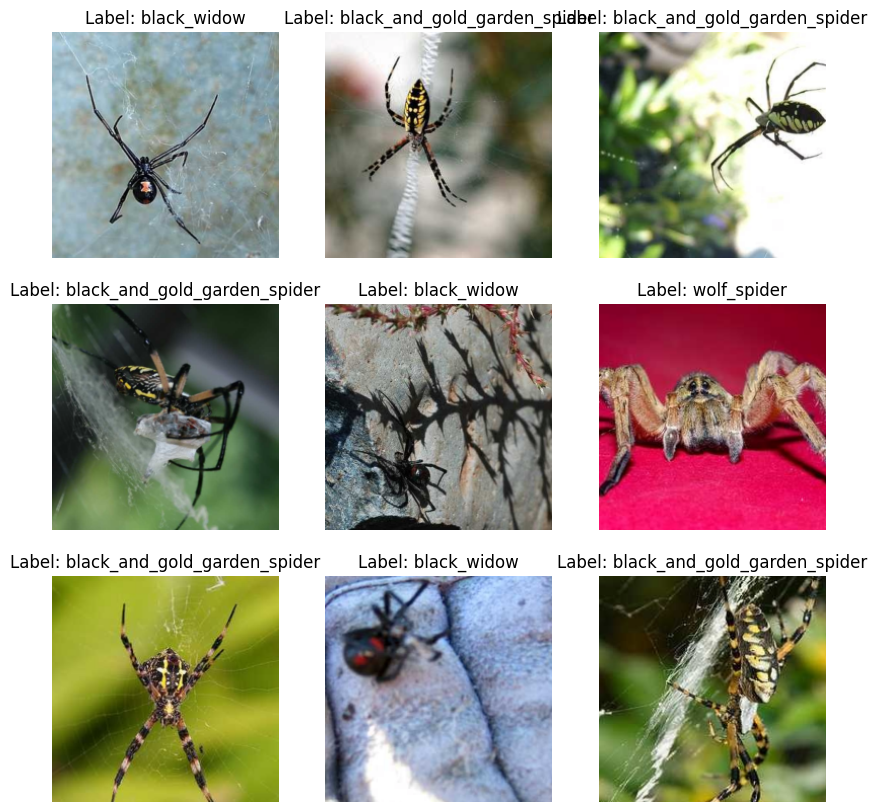

In [19]:
# Assuming train_loader is your PyTorch DataLoader
data_iter = iter(train_dataloader)

# Fetch the first batch of data
images, labels = next(data_iter)

# Function to unnormalize the image
def unnormalize(image, mean, std):
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)  # t = t * s + m
    return image

# Mean and std used for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = images[i].clone()  # Clone the tensor to avoid modifying the original image
    image = unnormalize(image, mean, std)  # Unnormalize the image
    image = image.permute(1, 2, 0).numpy()  
    image = (image * 255).astype(np.uint8)  # Convert from [0, 1] range to [0, 255] range for display
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4134207].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0

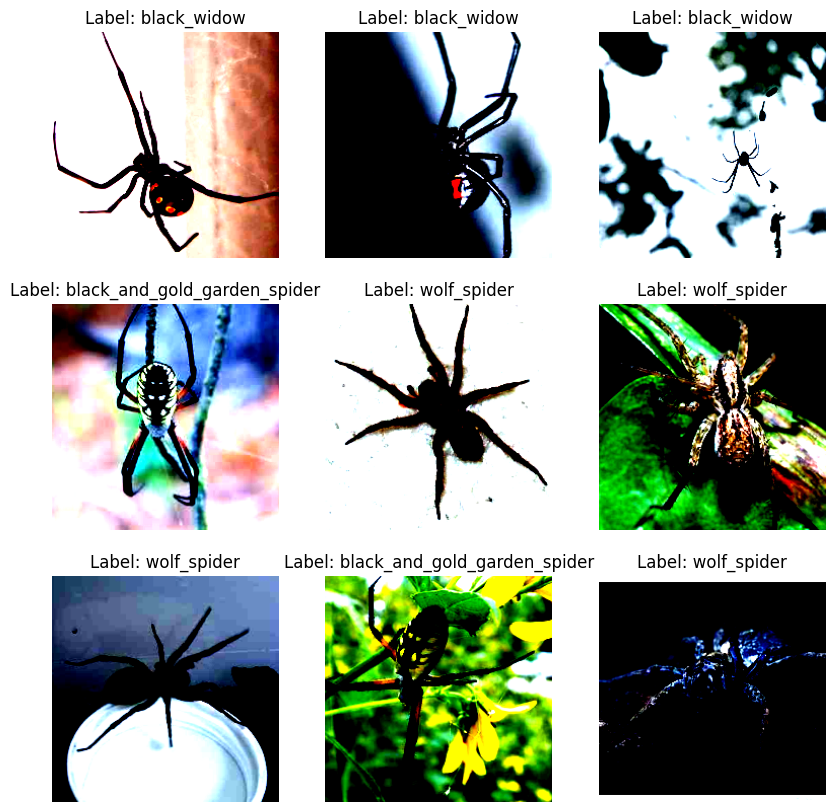

In [20]:
# Assuming train_dl is your PyTorch DataLoader
data_iter = iter(train_dataloader)

# Fetch the first batch of data
images, labels = next(data_iter)

# Plot the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    image = images[i].permute(1, 2, 0).numpy()  # Convert tensor to numpy array
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {class_names[labels[i].item()]}")
    plt.axis("off")

plt.show()

In [21]:
for image_batch, labels_batch in train_dataloader:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

torch.Size([32, 3, 224, 224])
torch.Size([32])


#### image_batch contains the batch of images and label_batch contains the coresponding labels. image_batch.shape contains the shape of image batch tensor. it will be in the form of batch_size = 32, channels = RGB(no.of color channels), so 3,  height and width = 224 (dimensions of the image)

#### labels_batch.shape prints the shape of label batch tensor which will be the batch size as there is only one label per image 

In [22]:
print(len(train_dataloader.dataset))
print(train_dataloader.dataset[0][0].shape) # shape of the first image
print(train_dataloader.dataset[1][0].shape) # shape of the second image

524
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


#### train_dataloader.dataset[0] fetches the first sample from the dataset, which is tuple of the form (images, label) and [0] will access the image part of this tuple

In [23]:
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32])


#### Step 4. Create a Convolutional Neural Network model to learn about your training set

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes, img_size):
        super(CustomCNN, self).__init__()
        
        # Initial rescaling layer
        self.initial_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=1),
            nn.BatchNorm2d(num_features=3),
            nn.ReLU(inplace=True)
        )
        
        # Convolutional layers
        self.convolutions = nn.ModuleList([
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        ])
        
        # Max pooling layer
        self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * (img_size // 8) * (img_size // 8), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Initial processing
        x = self.initial_layer(x)
        
        # Convolution and pooling
        for conv in self.convolutions:
            x = self.pooling(nn.functional.relu(conv(x)))

        # Flattening and fully connected layers
        x = torch.flatten(x, start_dim=1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

# Set input dimensions and classes
image_size = 224
num_classes = 3

# Instantiate the modified model
model = CustomCNN(num_classes, image_size)

#### Compile the model with adam optimizer and cross entropy loss function

In [25]:
# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [26]:
# Function to train the model
def execute_training(model, data_loader, loss_fn, optimizer, epochs=10):
    for current_epoch in range(epochs):
        model.train()  # Switch to training mode
        total_loss = 0.0
        total_accuracy = 0.0

        for batch_images, batch_labels in data_loader:
            optimizer.zero_grad()  # Reset gradients
            predictions = model(batch_images)  # Perform forward pass
            loss_value = loss_fn(predictions, batch_labels)  # Compute loss
            loss_value.backward()  # Backpropagation
            optimizer.step()  # Update weights

            # Calculate accuracy for this batch
            batch_accuracy = accuracy(predictions, batch_labels)
            total_accuracy += batch_accuracy.item() * batch_images.size(0)

            # Accumulate loss for the epoch
            total_loss += loss_value.item() * batch_images.size(0)

        # Calculate average loss and accuracy for the epoch
        average_loss = total_loss / len(data_loader.dataset)
        average_accuracy = total_accuracy / len(data_loader.dataset)
        
        # Log training metrics
        print(f"Epoch {current_epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Accuracy: {average_accuracy:.4f}")

# Set the number of epochs
epochs_to_train = 7  # Define how many epochs to run
execute_training(model, train_dataloader, criterion, optimizer, epochs_to_train)

Epoch 1/7, Loss: 1.1629, Accuracy: 0.3912
Epoch 2/7, Loss: 0.9870, Accuracy: 0.5095
Epoch 3/7, Loss: 0.9324, Accuracy: 0.5687
Epoch 4/7, Loss: 0.7981, Accuracy: 0.6336
Epoch 5/7, Loss: 0.6487, Accuracy: 0.7385
Epoch 6/7, Loss: 0.5857, Accuracy: 0.7710
Epoch 7/7, Loss: 0.3967, Accuracy: 0.8607


#### Training loop with data augmentation layers to tackle overfitting

In [27]:
import torch.optim as optim
import torch.nn.functional as F

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/5, Loss: 0.4995, Accuracy: 0.8244
Epoch 2/5, Loss: 0.2924, Accuracy: 0.8989
Epoch 3/5, Loss: 0.1473, Accuracy: 0.9676
Epoch 4/5, Loss: 0.0897, Accuracy: 0.9790
Epoch 5/5, Loss: 0.1847, Accuracy: 0.9351


#### Step 5. Make predictions on the test data and compare them to the expected categories

In [28]:
def evaluate_model(model, test_dl, criterion):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad(): 
        for images, labels in test_dl:
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            # Compute accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)

            # Track test loss
            test_loss += loss.item() * images.size(0)

    # Print test statistics
    epoch_loss = test_loss / len(test_dl.dataset)
    epoch_acc = test_acc / len(test_dl.dataset)
    print(f"Test Loss: {epoch_loss:.4f}, Test Accuracy: {epoch_acc:.4f}")

# Evaluate the model on the test dataset
evaluate_model(model, test_dataloader, criterion)

Test Loss: 1.2836, Test Accuracy: 0.6641


Model_1: Adding drop out layer for fighting overfitting

In [29]:
class CNNModel1(nn.Module):
    def __init__(self, num_classes, img_height, img_width):
        super(CNNModel1, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 128)
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Define input dimensions
img_height, img_width = 224, 224
# Define the number of classes
num_classes = 3

# Instantiate the model
model1 = CNNModel1(num_classes, img_height, img_width)

In [30]:
# Define the optimizer
optimizer = optim.Adam(model1.parameters())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model1, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model1.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            data_augmented_inputs = torch.stack([transforms.RandomHorizontalFlip()(img) for img in images])
            data_augmented_inputs = torch.stack([transforms.RandomRotation(degrees=10)(img) for img in data_augmented_inputs])
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model1(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model1, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/5, Loss: 1.1248, Accuracy: 0.3969
Epoch 2/5, Loss: 1.0106, Accuracy: 0.5191
Epoch 3/5, Loss: 0.8959, Accuracy: 0.6126
Epoch 4/5, Loss: 0.8559, Accuracy: 0.6011
Epoch 5/5, Loss: 0.7894, Accuracy: 0.6298


In [31]:
def evaluate_model(model1, test_dl, criterion):
    model1.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad(): 
        for images, labels in test_dl:
            outputs = model1(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss

            # Compute accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)

            # Track test loss
            test_loss += loss.item() * images.size(0)

    # Print test statistics
    epoch_loss = test_loss / len(test_dl.dataset)
    epoch_acc = test_acc / len(test_dl.dataset)
    print(f"Test Loss: {epoch_loss:.4f}, Test Accuracy: {epoch_acc:.4f}")

# Evaluate the model on the test dataset
evaluate_model(model1, test_dataloader, criterion)

Test Loss: 0.9162, Test Accuracy: 0.5802


In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Assuming test_dataloader is your DataLoader for the test dataset
# Get one image and its label from the test dataset
test_image, test_label = next(iter(test_dataloader))

# Select the first image from the batch
img_tensor = test_image[10].unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model1(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Get predicted class
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()

# Print the predicted class and confidence
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to black_and_gold_garden_spider with a 40.95% confidence.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.465708].


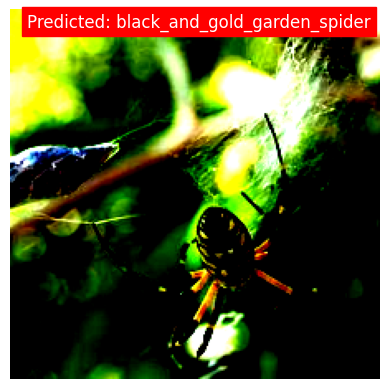

In [51]:
# Display the image with the predicted class name
image = test_image[10].permute(1, 2, 0).cpu().numpy()  # Convert tensor to numpy array for plotting
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

#### Trying the prediction on the unseen image from web

In [34]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
from torch import argmax

img_height, img_width = 224, 224
# Define the URL of the image
wolf_spider_url = "https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/UNX2RYQPLFFBDBUKABFYXUPKX4.jpg"
# Download the image and convert it to a PyTorch tensor
response = requests.get(wolf_spider_url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img = img.resize((img_width, img_height))  # Resize the image to match the model's input size
img_tensor = transforms.ToTensor()(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

In [35]:
# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Convert tensor to numpy array
predicted_class = class_names[argmax(probabilities)]

# Print the predicted class and confidence
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to wolf_spider with a 65.67% confidence.


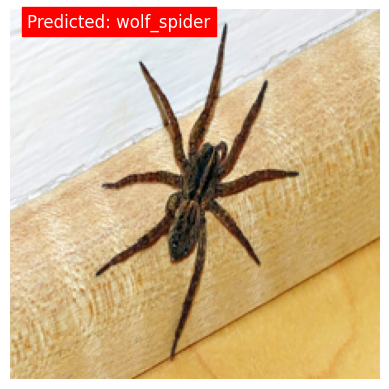

In [36]:
# Display the image with the predicted class name
image = np.array(img)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

In [37]:
# Load and preprocess the unseen image
image_path = 'tst_img3.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [38]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name

predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to black_and_gold_garden_spider with a 65.67% confidence.


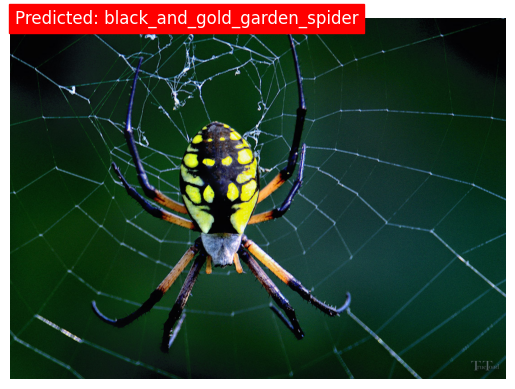

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

In [40]:
# Load and preprocess the unseen image
image_path = 'tst_img2.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [41]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name

predicted_class_name = class_names[predicted_class.item()]
probabilities = torch.softmax(outputs, dim=1)
confidence = torch.max(probabilities).item()
print(f"This image most likely belongs to {predicted_class_name} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to black_widow with a 65.67% confidence.


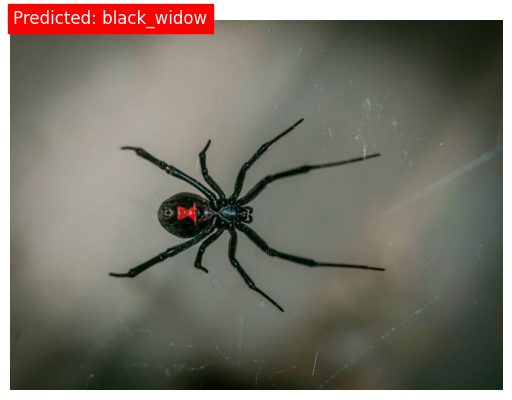

In [42]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

#### Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

In [43]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomGoogleNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomGoogleNet, self).__init__()
        # Load pre-trained GoogleNet model
        self.googlenet = models.googlenet(pretrained=True)

        # Modify the final layer
        # The original GoogleNet has an output of 1024 (for 1000 classes in ImageNet)
        # We replace it with a new Linear layer for our number of classes
        self.googlenet.fc = nn.Linear(self.googlenet.fc.in_features, num_classes)

    def forward(self, x):
        return self.googlenet(x)

# Define the number of classes
num_classes = 3  

# Instantiate the model
model_googlenet = CustomGoogleNet(num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_googlenet.parameters(), lr=0.001, momentum = 0.9)  


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_googlenet = model_googlenet.to(device)

/opt/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Step 7: Train the GoogleNet model and compare the accuracy with the first model.

In [44]:
# Define the metrics (accuracy)
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Define the training loop
def train_model(model, train_dl, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model_googlenet.train()  # Set the model to train mode
        train_loss = 0.0
        train_acc = 0.0

        for images, labels in train_dl:
            images, labels = images.to(device), labels.to(device)  # Move to GPU if available
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model_googlenet(images)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            # Compute training accuracy
            acc = accuracy(outputs, labels)
            train_acc += acc.item() * images.size(0)

            # Track training loss
            train_loss += loss.item() * images.size(0)

        # Print training statistics
        epoch_loss = train_loss / len(train_dl.dataset)
        epoch_acc = train_acc / len(train_dl.dataset)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Train the model
num_epochs = 5  # Choose the number of epochs
train_model(model_googlenet, train_dataloader, criterion, optimizer, num_epochs)

Epoch 1/5, Loss: 1.0525, Accuracy: 0.4504
Epoch 2/5, Loss: 0.7181, Accuracy: 0.8416
Epoch 3/5, Loss: 0.4784, Accuracy: 0.9332
Epoch 4/5, Loss: 0.3396, Accuracy: 0.9447
Epoch 5/5, Loss: 0.2797, Accuracy: 0.9389


In [45]:

def evaluate_model(model_googlenet, test_dl):
    model_googlenet.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    test_acc = 0.0

    with torch.no_grad():
        for images, labels in test_dl:
            images, labels = images.to(device), labels.to(device)  
            outputs = model_googlenet(images)  
            loss = criterion(outputs, labels)

            # Compute accuracy
            acc = accuracy(outputs, labels)
            test_acc += acc.item() * images.size(0)

            # Track test loss
            test_loss += loss.item() * images.size(0)

    # Print test statistics
    epoch_loss = test_loss / len(test_dl.dataset)
    epoch_acc = test_acc / len(test_dl.dataset)
    print(f"Test Loss: {epoch_loss:.4f}, Test Accuracy: {epoch_acc:.4f}")

# Evaluate the model on the test dataset
evaluate_model(model_googlenet, test_dataloader)

Test Loss: 0.2233, Test Accuracy: 0.9771


#### As compared to our previous models, using GoogleNet(Inception Net) gave better performance with test accuracy at 97.71% against the test accuracy at 58% at our previous model. This better performance is due to several reasons:

1. GoogleNet's Pre-trained weights which improved the performance especially when our dataset is smaller
2. The Architecture of GoogleNet is deeper with many convolutional layer and inception modeles, which allows the model to learn more complex patterns in the dataset
3. The architecture also has techniques like average pooling and dropout to prevent overfitting
4. It's inception module plays a big role to make the model robust against variations in the input images.

In [46]:
test_image, test_label = next(iter(test_dataloader))

# Select the first image from the batch
img_tensor = test_image[1].unsqueeze(0)  # Add batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

# Make predictions
model_googlenet.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model_googlenet(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Get predicted class
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()

# Print the predicted class and confidence
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to black_widow with a 95.58% confidence.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.465708].


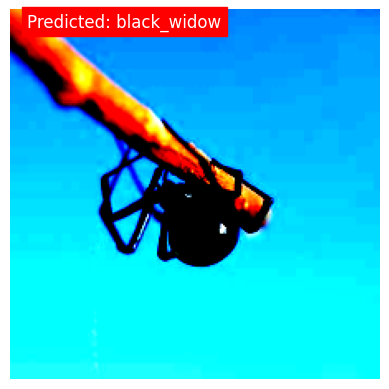

In [47]:
# Display the image with the predicted class name
image = test_image[1].permute(1, 2, 0).cpu().numpy()  # Convert tensor to numpy array for plotting
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

In [48]:
# Load and preprocess the unseen image
image_path = 'tst_img4.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
img_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension

# Move the tensor to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)

# Make predictions
model_googlenet.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model_googlenet(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)

# Get predicted class
predicted_class = class_names[torch.argmax(probabilities)]
confidence = torch.max(probabilities).item()

# Print the predicted class and confidence
print(f"This image most likely belongs to {predicted_class} with a {confidence*100:.2f}% confidence.")

This image most likely belongs to wolf_spider with a 73.48% confidence.


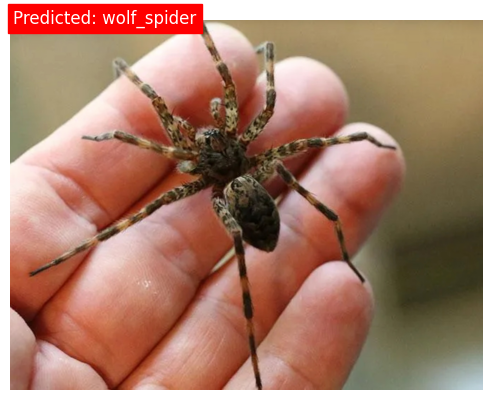

In [49]:
# Display the image with the predicted class name
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

### Thank You !!